# Data Science Course Final Project: *Predicting Cervical Cancer; Seeking Connections*

## 1. Problem Statement:
Around 11,000 new cases of invasive cervical cancer are diagnosed in the U.S. each year. Although it is one of the most preventable kinds of cancer, approximately 4,000 women in the U.S and about 300,000 women worldwide are killed by it. There are many factors that impact women's risk of cervical cancer including, age, race, sexual activity, oral contraceptives and many more. 

Many young women are brought up under societal expectations ruling over their bodies and sexual preferences. Because these monitored and influenced elements are significant in the body's suseptablility to invasive cervial cancer, it is crucial to research it thoroughly. The main goal of this project is to observe how accurately we may be able to predict which women will contract the disease.

Furthermore, I will be building a model that can predict the likelihood of a patient contracting cervical cancer by leveraging these patients' lifestyle patterns and influences. Using this model, I can help inform women on how to lower their risk of the disease all together or at least how to rase awareness based on one's pre-existing lifestyle patterns.

## 2. Approach Overview

### 2.1 Data Source
This dataset has been obtained by the UCI Repository and sourced from the Hospital Universitario de Caracas in Caracas, Venezuela. This data is comprised of demographics, lifestyle habits, and medical records of 858 patients. Several patients left survey questions unanswered due to privacy concerns, leaving them with a '?' value. 

This data was used in a predictive analysis study performed by Kelwin Fernandes, Jaime Cardoso, and Jessica Fernandes. 


### 2.2 Risks and Limitations: 
- Only 6% of the data involves biopsy = 1 cases. Unfortunately, when looking into medical data we typically see this trend as we are looking into the more uncommon cases
- The '?' values are from unanswered questions due to privacy concerns; filling these values in could lead to potential bias or other issues
- Lack of diversity if all 858 patients are from Venezuela and went to this specific hospital

### 2.3 Target Variables
`Biopsy` (examination) (0 = no cancer, 1 = cancer)

Biopsy tells us whether or not the patient was diagnosed with cervical cancer. While this may not be a 100% accurate representation of the cancerous patients, as misdiagnosing is a potential risk, it will be a clear target variable to assess how accurately we can predict whether a patient could be cancerous or not based on the feature variables.

### 2.4 Feature Variable
Starting feature variables: `Age`, `Number of Sexual Partners`, `First Sexual Intercourse`, `Number of pregnancies`, `Smokes` (0,1), `Smokes (packs/year)`, `Hormonal Contraceptives` (0,1), `Hormonal Contraceptives (years)`, `IUD (years)`, `STDs` (0,1), `STDs (number)`, etc (see the rest in cells below denoting colummns (cerv.columns))

As I ran some exploratory analysis alongside data cleaning I dropped certain columns and added a few using dummy encoding. 

Final feature variables: `Age`, `Num_SPs`, `First_SI`, `Num_Pregs`, `HC (years)`, `IUD (years)`, `STD_num`, `Dx:Cancer`, `Dx:CIN`, `Dx:HPV`, `Dx`, `Hinselmann`, `Schiller`, `Citology`, `Smokes_1.0`, `Smokes_Missing`, `HC_1.0`, `HC_Missing`, `IUD_1.0`, `IUD_Missing`, `STDs_1.0`, `STDs_Missing`, `Condylomatosis_1.0`, `Condylomatosis_Missing`, `Vaginal Condylomatosis_1.0`, `Vaginal Condylomatosis_Missing`, `Vulvo-Perineal Condylomatosis_1.0`, `Vulvo-Perineal Condylomatosis_Missing`, `Syphilis_1.0`, `Syphilis_Missing`, `Pelvic Inflammatory Disease_1.0`, `Pelvic Inflammatory Disease_Missing`, `Genital Herpes_1.0`, `Genital Herpes_Missing`, `Molluscum Contagiosum_1.0`, `Molluscum Contagiosum_Missing`, `HIV_1.0`, `HIV_Missing`, `Hepatitis B_1.0`, `Hepatitis B_Missing`, `HPV_1.0'`, and `HPV_Missing`.

### 2.5 Model Approach
The study described is a classification problem as I am attempting to classify patient's lifestyle habits and medical records into a risk factor for predicting potential contraction of cervical cancer. I tested nine different models all including a 'best threshhold probability' which involved a self-made defintion along with a wrapper function. I tested a Logistic Regression, a Decision Tree Classification, and a Random Forest Classification technique along with three different balancing techniques: SMOTE, SMOTE-ENN, and SMOTETomek to balance the incredibly imbalanced target variable `Biopsy`. Because precision and recall are both crucial to this prediction, with a higher emphasis on recall, I will use a $F_\beta$ score with a $\beta$ = 2. I will also look into tuning hyperparamters to ensure the best score is obtained.

## Brief description on data 

- IUD - Intra Uterine Device (a form of contraceptive)
- STDs - Sexually Transmitted Diseases
- HPV - Human Papilloma Virus
- HIV - Human Immunodeficiency Virus
- AIDS - Acquired Immunodeficiency Syndrome (caused by HIV)
- CIN - Cervical Intraepithelial Neoplasia
- Dx - Medical Abbreviation for Diagnosis
- Hinselmann - Test method for cervical cancer by examining the cells on an instrument called colposcope
- Schiller - Test in which iodine solution is applied to the cervix in order to diagnose cervical cancer
- Citology - Collects cervical cells so they can be checked for changes caused by HPV that may—if left untreated—turn into cervical cancer
- Biopsy - Procedure to remove cells, tissue or fluid for examination by a medical pathologist

## 3. Data Preparation

In [1]:
#Notebook preparation
import pandas as pd
import numpy as np
from pathlib import Path

#Import visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries required for modeling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from model_inspector import get_inspector 
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, fbeta_score, precision_recall_curve

In [2]:
# Load in the data from downloaded file
cerv = pd.read_csv('../../FINAL_PROJECT/data/kag_risk_factors_cervical_cancer.csv')

# Rename certain columns for more efficient coding 
cerv = cerv.rename(columns =  {'Number of sexual partners': 'Num_SPs',
                              'First sexual intercourse': 'First_SI',
                              'Num of pregnancies' : 'Num_Pregs',
                              'Hormonal Contraceptives' : 'HC',
                              'Hormonal Contraceptives (years)': 'HC (years)',
                              'STDs (number)': 'STD_num',
                              'STDs:condylomatosis': 'Condylomatosis',
                              'STDs:cervical condylomatosis': 'Cervical Condylomatosis',
                              'STDs:vaginal condylomatosis': 'Vaginal Condylomatosis',
                              'STDs:vulvo-perineal condylomatosis': 'Vulvo-Perineal Condylomatosis',
                              'STDs:syphilis': 'Syphilis',
                              'STDs:pelvic inflammatory disease': 'Pelvic Inflammatory Disease',
                              'STDs:genital herpes': 'Genital Herpes',
                              'STDs:molluscum contagiosum': 'Molluscum Contagiosum',
                              'STDs:AIDS': 'AIDS',
                              'STDs:HIV': 'HIV',
                              'STDs:Hepatitis B': 'Hepatitis B',
                              'STDs:HPV': 'HPV',
                              'STDs: Number of diagnosis': 'STD_num_diagnosis'})

### 3.1 Cleaning Up Feature Variables

In [3]:
# Some columns have the value '?' for those who did not answer the survey questions
# Let's transform all columns into numerical columns 
# The following code transforms the '?' values into NaN values
for i in cerv.columns:
    cerv[i] = pd.to_numeric(cerv[i], errors='coerce')
cerv.shape

(858, 36)

### 3.2 Testing and Handling Missing Values

In [4]:
# I've gone ahead and deleted variables: 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'
# as there were 787 missing values in both and they feel like redundant variables to 'STDs' and 'STD_num'
cerv = cerv.drop(columns = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])

# Additionally after looking at a correlation matrix, I decided to drop 'Smokes (years)' and 'Smokes(packs/year)' 
# (which respectively had a missing values count of 13)
# because they are both highly correlated with one another and seem to be redundant
cerv = cerv.drop(columns = ['Smokes (years)', 'Smokes (packs/year)', 'STD_num_diagnosis'])

# Considering this is a fairly small dataset, I went through all quantitative variables and set each of them to either 'mode', 'mean', or 'median' 
# depending on how little it affected the variables distribution and the target variable's distribution when grouped by the feature variable 

# 'Number of Sexual Partners' --> mode
cerv.Num_SPs.fillna(cerv.Num_SPs.mode()[0], inplace=True)

# First Sexual Intercourse Age --> mode 
# with median and mode being the optimal choices I chose the mode because it was smaller
# and I want this project to target the less educated (aka the younger audience)
cerv.First_SI.fillna(cerv.First_SI.mode()[0], inplace=True)

# Number of Pregnancies --> median
cerv.Num_Pregs.fillna(cerv.Num_Pregs.median(), inplace=True)

# Years on Hormonal Contraceptives --> mean
cerv['HC (years)'].fillna(cerv['HC (years)'].mean(), inplace=True)

# Years on an IUD --> mean
cerv['IUD (years)'].fillna(cerv['IUD (years)'].mean(), inplace=True)

# Number of STDs --> mean
cerv.STD_num.fillna(cerv.STD_num.mean(), inplace=True)

# To target the categorical, binary variables with missing values, I will be creating dummy columns for each of them
# First I will delete the variables that only contained 0.0 as this will not aid our model building
cerv.drop(columns=['AIDS', 'Cervical Condylomatosis'], inplace=True)

cerv.fillna('Missing', inplace = True)
cerv = pd.get_dummies(cerv, 
                      columns= ['Smokes', 'HC', 'IUD', 'STDs', 'Condylomatosis', 
                                'Vaginal Condylomatosis', 'Vulvo-Perineal Condylomatosis', 'Syphilis',
                               'Pelvic Inflammatory Disease', 'Genital Herpes', 'Molluscum Contagiosum',
                               'HIV', 'Hepatitis B', 'HPV'], drop_first=True)

In [5]:
print(cerv.shape)
cerv.isna().sum()

(858, 43)


Age                                      0
Num_SPs                                  0
First_SI                                 0
Num_Pregs                                0
HC (years)                               0
IUD (years)                              0
STD_num                                  0
Dx:Cancer                                0
Dx:CIN                                   0
Dx:HPV                                   0
Dx                                       0
Hinselmann                               0
Schiller                                 0
Citology                                 0
Biopsy                                   0
Smokes_1.0                               0
Smokes_Missing                           0
HC_1.0                                   0
HC_Missing                               0
IUD_1.0                                  0
IUD_Missing                              0
STDs_1.0                                 0
STDs_Missing                             0
Condylomato

### 3.3 Summary of Final Clean Dataset

In [6]:
# Columns included in the clean dataset
pd.Series(cerv.columns)

0                                       Age
1                                   Num_SPs
2                                  First_SI
3                                 Num_Pregs
4                                HC (years)
5                               IUD (years)
6                                   STD_num
7                                 Dx:Cancer
8                                    Dx:CIN
9                                    Dx:HPV
10                                       Dx
11                               Hinselmann
12                                 Schiller
13                                 Citology
14                                   Biopsy
15                               Smokes_1.0
16                           Smokes_Missing
17                                   HC_1.0
18                               HC_Missing
19                                  IUD_1.0
20                              IUD_Missing
21                                 STDs_1.0
22                             S

In [7]:
# Top 10 rows of my dataset
cerv.head(10)

,Age,Num_SPs,First_SI,Num_Pregs,HC (years),IUD (years),STD_num,Dx:Cancer,Dx:CIN,Dx:HPV,...,Genital Herpes_1.0,Genital Herpes_Missing,Molluscum Contagiosum_1.0,Molluscum Contagiosum_Missing,HIV_1.0,HIV_Missing,Hepatitis B_1.0,Hepatitis B_Missing,HPV_1.0,HPV_Missing
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,3.0,0.000000,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,46,3.0,21.0,4.0,15.0,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,0.0,7.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,26,1.0,26.0,3.0,2.0,7.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,44,3.0,15.0,2.0,0.0,0.514804,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Summary statsitics 
cerv.describe()

,Age,Num_SPs,First_SI,Num_Pregs,HC (years),IUD (years),STD_num,Dx:Cancer,Dx:CIN,Dx:HPV,...,Genital Herpes_1.0,Genital Herpes_Missing,Molluscum Contagiosum_1.0,Molluscum Contagiosum_Missing,HIV_1.0,HIV_Missing,Hepatitis B_1.0,Hepatitis B_Missing,HPV_1.0,HPV_Missing
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.257576,2.256419,0.514804,0.176627,0.020979,0.010490,0.020979,...,0.001166,0.122378,0.001166,0.122378,0.020979,0.122378,0.001166,0.122378,0.002331,0.122378
std,8.497948,1.644759,2.797653,1.400981,3.519082,1.805585,0.526440,0.143398,0.101939,0.143398,...,0.034139,0.327913,0.034139,0.327913,0.143398,0.327913,0.034139,0.327913,0.048252,0.327913
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,2.256419,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,30.000000,19.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Summary statistics on Biopsy
cerv.Biopsy.describe()

count    858.000000
mean       0.064103
std        0.245078
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Biopsy, dtype: float64

## 4. Exploratory Data Analysis

In [10]:
# Let's take a deeper dive into why there may be missing data
cerv_missing = cerv[['HPV_Missing', 'Hepatitis B_Missing', 'HIV_Missing', 'Molluscum Contagiosum_Missing', 'Genital Herpes_Missing',
                    'Pelvic Inflammatory Disease_Missing', 'Syphilis_Missing', 'Vulvo-Perineal Condylomatosis_Missing', 'Vaginal Condylomatosis_Missing',
                     'Condylomatosis_Missing', 'STDs_Missing', 'IUD_Missing', 'HC_Missing', 'Smokes_Missing']]
print(cerv_missing.describe().iloc[1])
print(cerv_missing[cerv_missing == 1].sum())

HPV_Missing                              0.122378
Hepatitis B_Missing                      0.122378
HIV_Missing                              0.122378
Molluscum Contagiosum_Missing            0.122378
Genital Herpes_Missing                   0.122378
Pelvic Inflammatory Disease_Missing      0.122378
Syphilis_Missing                         0.122378
Vulvo-Perineal Condylomatosis_Missing    0.122378
Vaginal Condylomatosis_Missing           0.122378
Condylomatosis_Missing                   0.122378
STDs_Missing                             0.122378
IUD_Missing                              0.136364
HC_Missing                               0.125874
Smokes_Missing                           0.015152
Name: mean, dtype: float64
HPV_Missing                              105.0
Hepatitis B_Missing                      105.0
HIV_Missing                              105.0
Molluscum Contagiosum_Missing            105.0
Genital Herpes_Missing                   105.0
Pelvic Inflammatory Disease_Missing   

The following missing variables share an average of `~12.2%`: HPV, Hepatitis B, HIV, Moluscum Contagiosum, Genital Herpes, Pelvic Inflammatory Disease, Syphilis, Vulvo-Perineal Condylomatosis, Vaginal Condylomatosis, Condylomatosis, and STDs. This along with the above counts leads me to believe these represent people who avoided the STD questions all together. 

In [11]:
# Let's take a look at those who were on hormonal contraceptives 
# First let's do this by creating a dataframe without the 'missing' columns (which we can use more in this project)
cerv_full = cerv.drop(columns=['HPV_Missing', 'Hepatitis B_Missing', 'HIV_Missing', 'Molluscum Contagiosum_Missing', 'Genital Herpes_Missing',
                    'Pelvic Inflammatory Disease_Missing', 'Syphilis_Missing', 'Vulvo-Perineal Condylomatosis_Missing', 'Vaginal Condylomatosis_Missing',
                     'Condylomatosis_Missing', 'STDs_Missing', 'IUD_Missing', 'HC_Missing', 'Smokes_Missing'])

cerv_full.describe().iloc[1]

Age                                  26.820513
Num_SPs                               2.511655
First_SI                             16.979021
Num_Pregs                             2.257576
HC (years)                            2.256419
IUD (years)                           0.514804
STD_num                               0.176627
Dx:Cancer                             0.020979
Dx:CIN                                0.010490
Dx:HPV                                0.020979
Dx                                    0.027972
Hinselmann                            0.040793
Schiller                              0.086247
Citology                              0.051282
Biopsy                                0.064103
Smokes_1.0                            0.143357
HC_1.0                                0.560606
IUD_1.0                               0.096737
STDs_1.0                              0.092075
Condylomatosis_1.0                    0.051282
Vaginal Condylomatosis_1.0            0.004662
Vulvo-Perinea

With an average age of 26.8 and 75% of the patients are below the age of 32, it is not shocking that ~50% of the patients are using hormonal contraceptives. But let's look into that more...

In [12]:
cerv_full[cerv_full.Age <= 32].describe().iloc[1]

Age                                  23.140888
Num_SPs                               2.473201
First_SI                             16.517611
Num_Pregs                             1.960184
HC (years)                            1.790823
IUD (years)                           0.344104
STD_num                               0.178565
Dx:Cancer                             0.015314
Dx:CIN                                0.009188
Dx:HPV                                0.015314
Dx                                    0.024502
Hinselmann                            0.039816
Schiller                              0.068913
Citology                              0.050536
Biopsy                                0.055130
Smokes_1.0                            0.137825
HC_1.0                                0.534456
IUD_1.0                               0.058193
STDs_1.0                              0.088821
Condylomatosis_1.0                    0.052067
Vaginal Condylomatosis_1.0            0.003063
Vulvo-Perinea

So, of those patients who are aged 32 or below, only ~53.4% are on hormonal contraceptives...this is not terribly suprising considering hormonal contraceptives, while they may seem like a norm for some, in reality is not for everyone.

Also, let's consider people in their mid to late 20s and early 30s may be trying to get pregnant (aka no HCs) and those that are not having sex altogether.

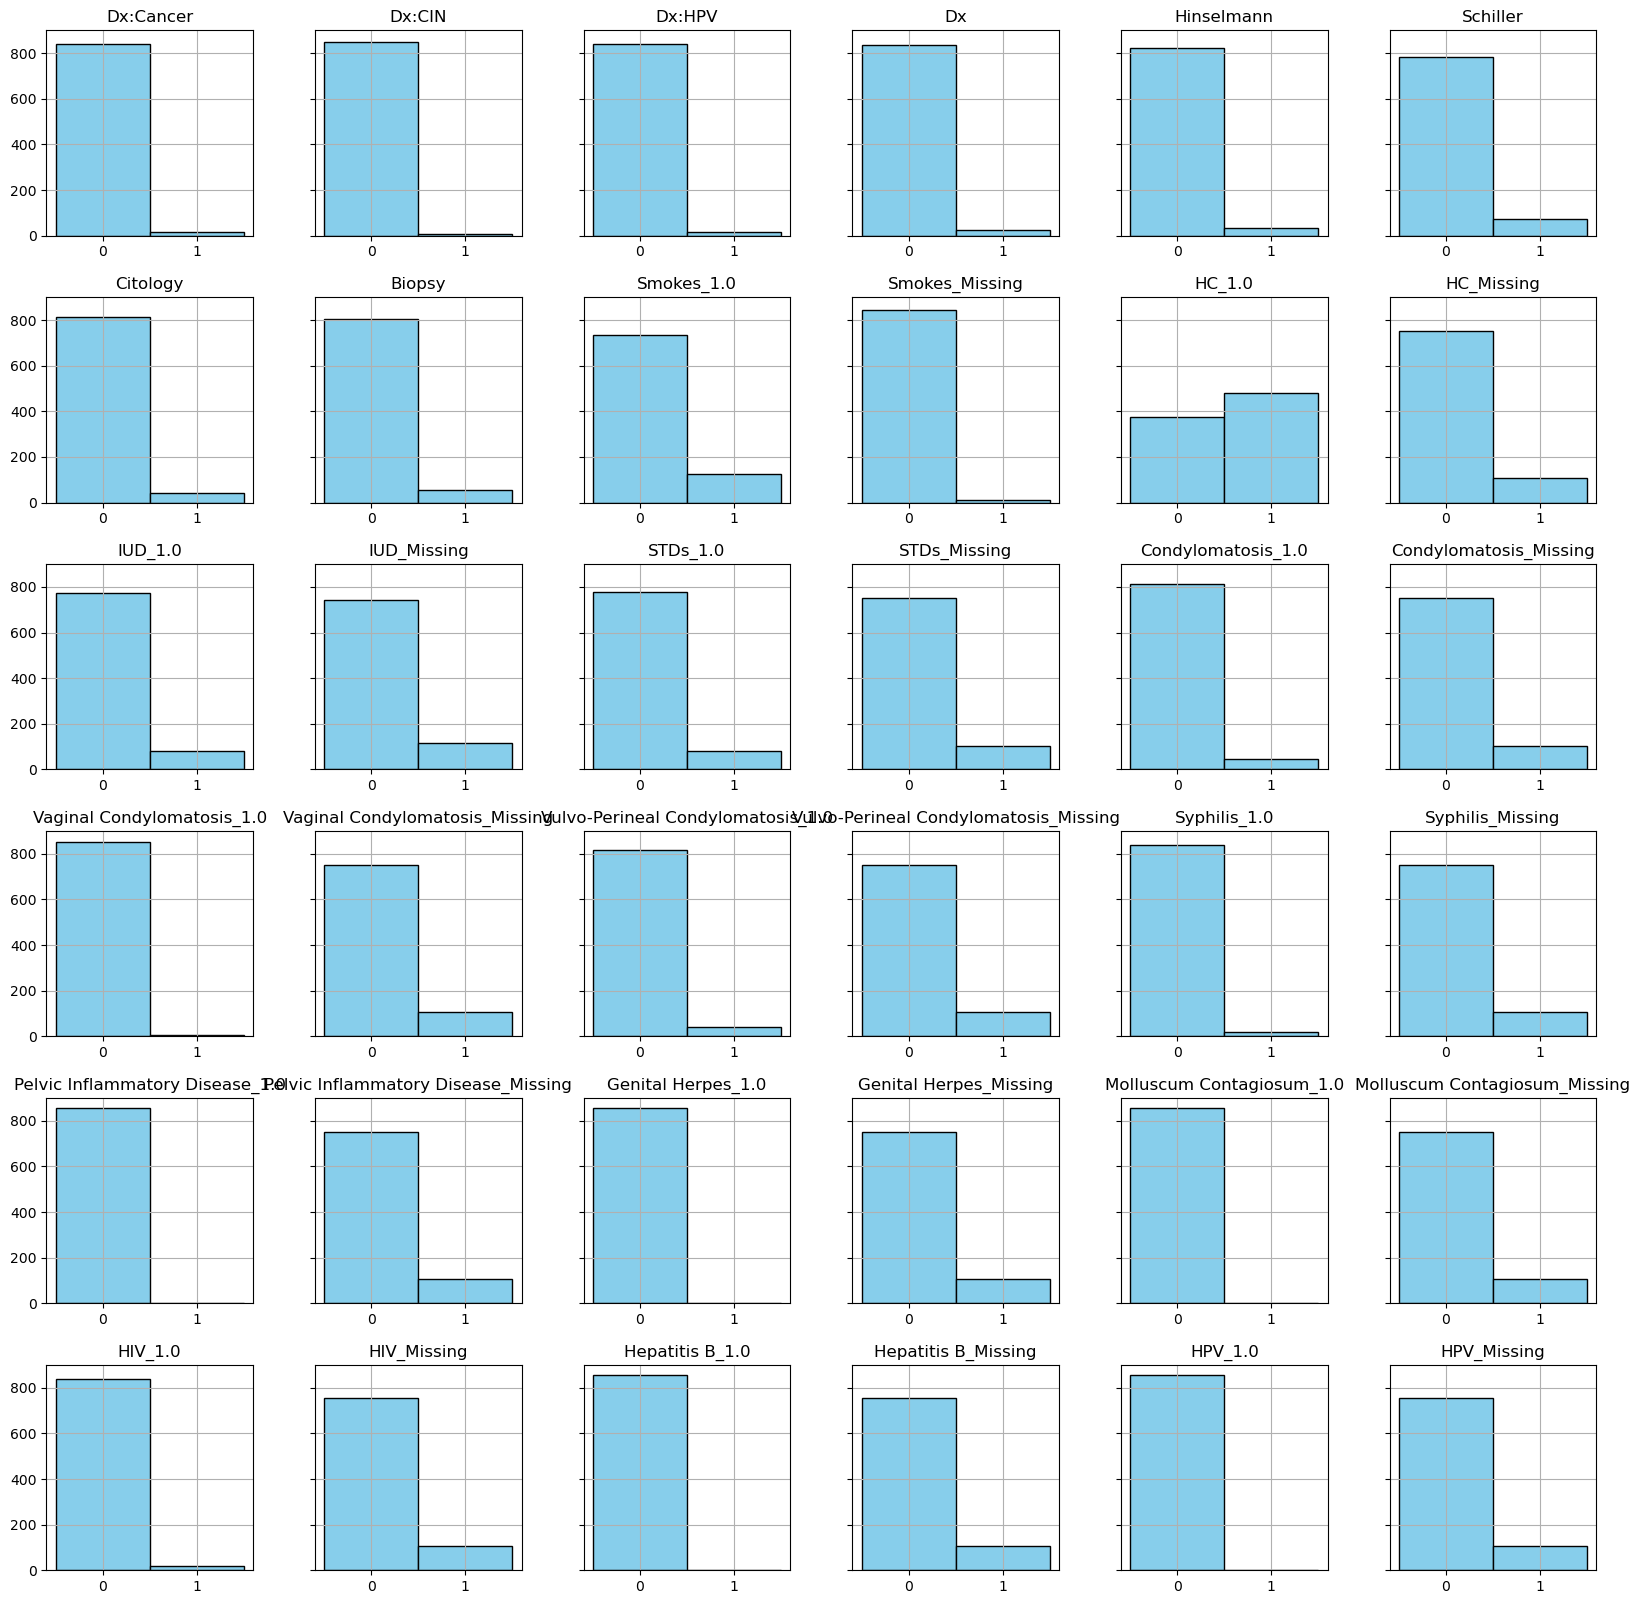

In [13]:
# Let's take a look at the categorical, binary variables distributions
cerv_categorical = cerv[['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'Smokes_1.0',
       'Smokes_Missing', 'HC_1.0', 'HC_Missing', 'IUD_1.0', 'IUD_Missing',
       'STDs_1.0', 'STDs_Missing', 'Condylomatosis_1.0',
       'Condylomatosis_Missing', 'Vaginal Condylomatosis_1.0',
       'Vaginal Condylomatosis_Missing', 'Vulvo-Perineal Condylomatosis_1.0',
       'Vulvo-Perineal Condylomatosis_Missing', 'Syphilis_1.0',
       'Syphilis_Missing', 'Pelvic Inflammatory Disease_1.0',
       'Pelvic Inflammatory Disease_Missing', 'Genital Herpes_1.0',
       'Genital Herpes_Missing', 'Molluscum Contagiosum_1.0',
       'Molluscum Contagiosum_Missing', 'HIV_1.0', 'HIV_Missing',
       'Hepatitis B_1.0', 'Hepatitis B_Missing', 'HPV_1.0', 'HPV_Missing']]

ax5 = cerv_categorical.hist(figsize=(20,20), sharey=True, bins = 5)
axs = ax5.flatten()

# I got this from ChatGPT in order to make it look a little better  
for i, column in enumerate(cerv_categorical.columns):
    cerv_categorical[column].hist(ax=axs[i], bins=[-0.5, 0.5, 1.5], color=['skyblue'], edgecolor='black', linewidth=1)
    
    axs[i].set_title(column)

Almost all of the categorical variables are very imbalanced apart from `HC_1.0` aka horomonal contraceptives.

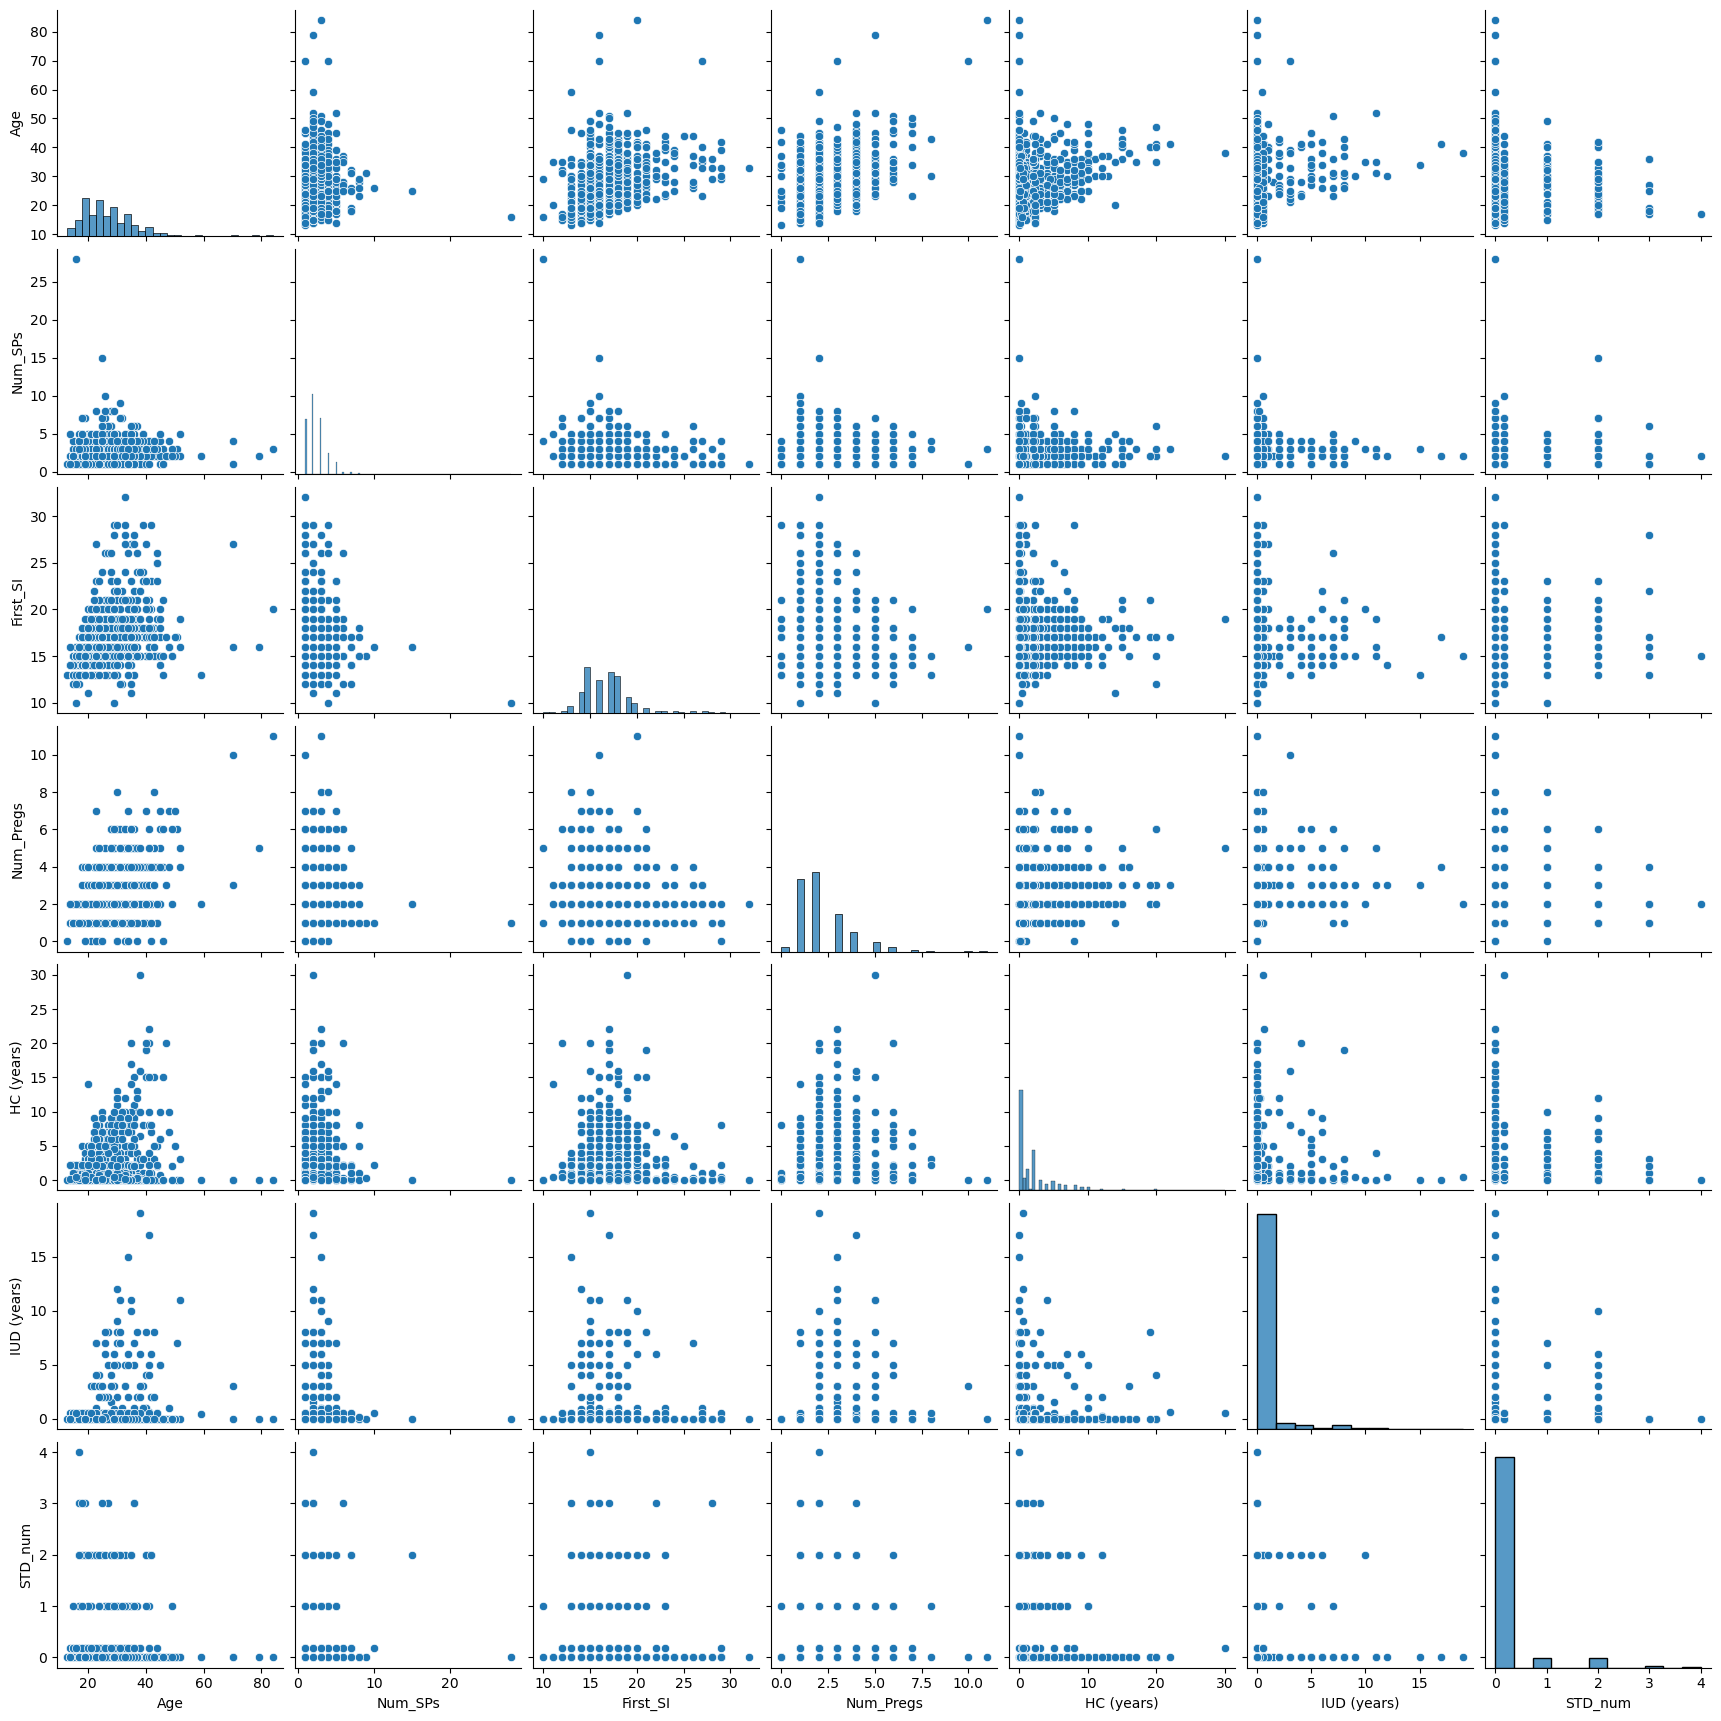

In [14]:
# Let's take a look at relationships between quantitative variables
cerv_qv = cerv[['Age', 'Num_SPs', 'First_SI', 'Num_Pregs', 'HC (years)', 'IUD (years)', 'STD_num']]
g = sns.pairplot(cerv_qv)

There are no linear relationships here. This will not be a problem considering I am running a classification model, which tend to be better at capturing non-linear and complex relationships between variables.

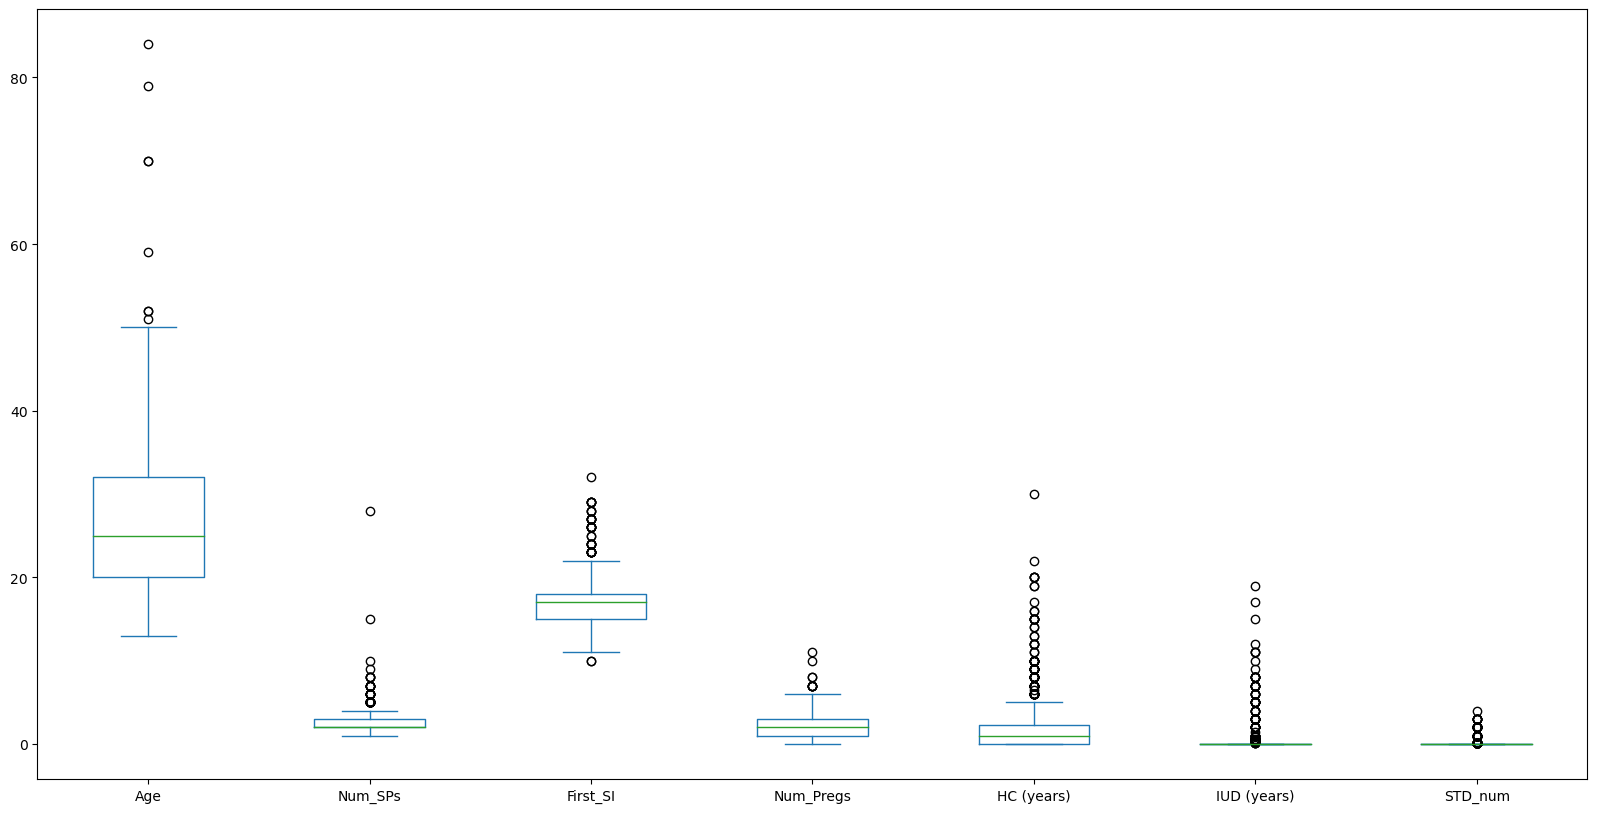

In [15]:
ax = cerv_qv.plot(kind='box', figsize=(20, 10)) 

All quantitative variables here, apart from `Num_Pregs`, `STD_num`, and `STD_num_diagnosis`, seem to have a fair number of outliers insinuating skewness in this data. If I use a Decision Tree or Random Forest model, I can avoid this being a problem as they both scale the data.

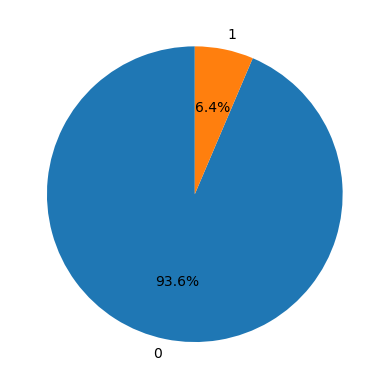

In [16]:
# Let's take one last look at something...let's see balanced our target variable is...
y = cerv.Biopsy.value_counts(normalize=True) 

fig, ax = plt.subplots()
ax.pie(y, labels=y.index, autopct='%1.1f%%', startangle=90);

# We have a massive imbalance in the data!

## 5. Model Building

**Precision** (in this study): Misdiagnosing a non-cancerous patient. Can cause a decline in mental health and risk of negative effects from treatments such as chemo.

**Recall** (in this study): Misdiagnosing a cancerous patient. If left untreated, can lead to death.

While **precision** and **recall** are both extremely important in this study, recall provides a higher risk. So, I have decided to score my model's based on the $F_\beta$ score with a $\beta$ = 2.

In [17]:
# Custom scoring function to optimize for F-beta score and threshold
def custom_scorer(estimator, X, y):
    y_proba = estimator.predict_proba(X)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y, y_proba)

    # Calculate F-beta score for different thresholds
    fbeta_scores = [fbeta_score(y, y_proba > threshold, beta=2) for threshold in thresholds]

    # Find the index of the threshold that maximizes the F-beta score
    best_threshold_index = np.argmax(fbeta_scores)

    # Return the best F-beta score and corresponding threshold
    return fbeta_scores[best_threshold_index], thresholds[best_threshold_index]

# Wrapper function to extract the F-beta score from the tuple
def fbeta_score_extractor(estimator, X, y):
    return custom_scorer(estimator, X, y)[0]

Due to the imbalance of the target variable, we will be using one of the following methods from the `imblearn` package:
- **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates synthetic samples for the minority class based on the existing minority samples.
- **SMOTE-ENN (SMOTE with Edited Nearest Neighbors)**: Applies SMOTE followed by cleaning with ENN to remove noisy samples.
- **SMOTE-Tomek**: Applies SMOTE followed by cleaning with Tomek links to remove redundant samples.

After running each method with (1) Logistic Regression, Decision Tree Classifier, and Random Forest Classifier learning methods, (2) tuning the hyperparameters, and (3) tuning the threshold probability I landed on a Random Forest Classifier model that uses Smote-ENN to balance the data.

In [18]:
# Define X_train, y_train, X_test, and y_test 
X = cerv.drop(columns = ['Biopsy'])
y = cerv.Biopsy
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

# Create a pipeline with SMOTEENN and RandomForestClassifier
smoteenn_rfc = Pipeline(steps=[
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'model__max_features': [1.0, 0.5, np.sqrt(len(X_train.columns)) / len(X_train.columns), np.log2(len(X_train.columns)) / len(X_train.columns), 1/3],
    'model__n_estimators': range(10, 600, 50),
    'model__min_samples_leaf': [150, 180, 200, 220, 250]
}

# Use GridSearchCV with the pipeline and custom scoring function
grid_sm_enn_rfc = GridSearchCV(
    estimator=smoteenn_rfc,
    param_grid=param_grid,
    cv=KFold(10, shuffle=True, random_state=1), # I newly bumped up the KFold from 5 to 10 here (this increased the score by about 1.6%)
    return_train_score=True,
    scoring=fbeta_score_extractor,
    n_jobs=-1
)

# Fit the grid search on your data
grid_sm_enn_rfc.fit(X_train, y_train)

# Print the best parameters, the corresponding F-beta score, and the best threshold
print("Best Parameters:", grid_sm_enn_rfc.best_params_)
print(f"Best F-beta (beta=2) Score: {grid_sm_enn_rfc.best_score_}")
print(f"Best Threshold: {custom_scorer(grid_sm_enn_rfc.best_estimator_, X_train, y_train)[1]}")

Best Parameters: {'model__max_features': 0.3333333333333333, 'model__min_samples_leaf': 200, 'model__n_estimators': 210}
Best F-beta (beta=2) Score: 0.8709676932974147
Best Threshold: 0.5931382240420673


This model uses a max feature of 1/3, meaning it uses about a third of the features for each split, 200 minimum samples required in the training data, 210 trees per forest and a ~59.3% probability threshold. 

In [39]:
# Time to get the score on the test data and compare it to the train data!
print("Training score:", grid_sm_enn_rfc.score(X_test, y_test))

Training score: 0.7999999999999999


In [47]:
# Confusion matrix
inspector = get_inspector(grid_sm_enn_rfc.best_estimator_['model'], X, y)
inspector.confusion_matrix()

# False negatives are very low, this is good!

,Predicted 0,Predicted 1,Totals
Actual 0,616,187,803
Actual 1,7,48,55
Totals,623,235,858


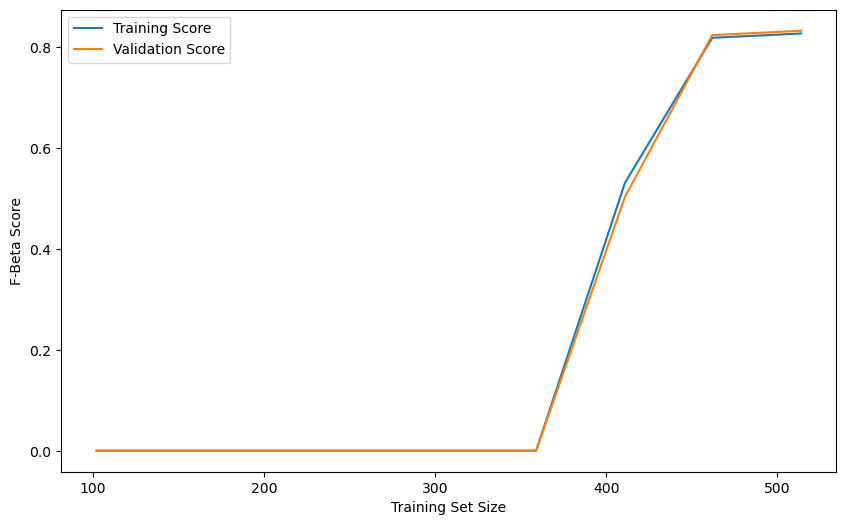

In [20]:
# Let's visually compare as well
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Add this after fitting the model
train_sizes, train_scores, val_scores = learning_curve(
    grid_sm_enn_rfc.best_estimator_, X_train, y_train, cv=5, 
    scoring=fbeta_score_extractor, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('F-Beta Score')
plt.legend()
plt.show()

## 6. Model Evaluation

I find it interesting the model uses a probability threshold of approximately `59.3%` to depict whether it will predict cancer or not. I was expecting a score below 50% due to the emphasis on recall. However, I could be interpreting this wrong. 

**Variance**: When looking at the almost identical training and test scores visual, I can see there is no overfitting here. I believe the Random Forest and high `min_samples_leaf` is to thank here for this. However, there is a slight drop in train score, `87%` to test score, `~80%`. I would say this means there is low to moderate variance, which I do not see as negatively affecting my model too harshly.

**Bias**: If the best possible score on the model is `100%`, then we are looking at a `13%` drop to the train score. This isinuates we have more of a bias than a variance problem with this model. However, with a relatively high train score of `87%`, I would say the bias is not high and this model performs well overall. 

In [40]:
# Let's identify which features are important 

# Let's get the model from the best estimator grid model
best_sm_enn_rfc_model = grid_sm_enn_rfc.best_estimator_['model']

# Get feature importances
feature_importances = best_sm_enn_rfc_model.feature_importances_

feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

,Feature,Importance
3,Num_Pregs,0.317428
12,Schiller,0.291723
2,First_SI,0.111436
4,HC (years),0.108625
0,Age,0.083337
16,HC_1.0,0.033813
6,STD_num,0.030186
1,Num_SPs,0.020178
5,IUD (years),0.003274
27,Vulvo-Perineal Condylomatosis_Missing,0.000000


## 6. Feature Evaluation

In [43]:
feature_importances_df.head(9)

,Feature,Importance
3,Num_Pregs,0.317428
12,Schiller,0.291723
2,First_SI,0.111436
4,HC (years),0.108625
0,Age,0.083337
16,HC_1.0,0.033813
6,STD_num,0.030186
1,Num_SPs,0.020178
5,IUD (years),0.003274


Upon further research, I found that HPV, smoking, long-term use of birth control, and multiple pregnancies can heighten one's risk of cervical cancer. That being said, I find it fascinating that most of the feature variables hold little to no importance, especially the HPV and smoking. The model does, however, reflect this research in its values of number of pregnancies (`Num_Pregs`), hormonal contraceptives (`HC_1.0` and `HC (years` and `IUD (years)`). 

Other feature importances that seem intuitive to me are and the number of STDs (`STD_num`), number of sexual partners (`Num_SPs`), as that can increase your chance of STDs, and `Schiller`, which is a kind of test that detects dangers such as cervical cancer. I find it interesting that the Schiller test ended up having a higher impact than the other tests (Hinselmann and Citology).